In [1]:
from time import time

import jax
import jax.numpy as jnp
from jax import grad, value_and_grad, vmap, jit, random
import equinox as eqx
import optax
from jaxopt import OptaxSolver
import matplotlib.pyplot as plt

from playground_jax.models import *

We want to fit the following function scalar real-valued funciton
$ f: D \subset \mathbb{R} \rightarrow \mathbb{R}$, $ f(x) = \sqrt{|x|}$, $D = [-1, 1]^2$

1. Generate training data

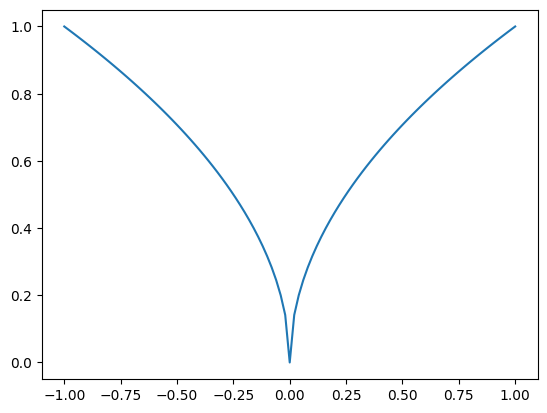

In [2]:
N = 101
x = jnp.expand_dims(jnp.linspace(-1, 1, N), axis=-1)
y = jnp.sqrt(jnp.abs(x))

fig, ax = plt.subplots()
ax.plot(x, y)

2. build a model

In [3]:
# set a random key
key = random.PRNGKey(1)

# Generate random data for input
d_in, d_hidden, d_out = 1, 32, 1

#model = Linear(d_in, d_out, key=key)
model = FeedForwardNN(d_in, d_out, d_hidden, key=key)

3. Define loss

In [7]:
# get mean square error loss function
@jit
def loss_fn(model, x, y):
    pred_y = vmap(model, in_axes=0, out_axes=0)(x)
    return jax.numpy.mean((y - pred_y) ** 2)

In [8]:
# 4. choose optimizer

In [10]:
opt = optax.adam(0.01)
solver = OptaxSolver(opt=opt, fun=loss_fn, maxiter=1000)

4. Train

In [5]:
lr = 1e-2
steps = int(1e3)
for i in range(steps):
    t0 = time()
    loss, grads = value_and_grad(loss_fn)(model, x, y)
    model = jax.tree_util.tree_map(lambda m, g: m - lr * g, model, grads)
    t1 = time()
    if i % int(1e2) == 0: 
        print('it: {:d}, loss: {:.3e}, time: {:.4f}s'.format(i, loss, t1-t0))

it: 0, loss: 3.169e-01, time: 0.1870s
it: 100, loss: 6.383e-02, time: 0.0014s
it: 200, loss: 5.883e-02, time: 0.0013s
it: 300, loss: 5.423e-02, time: 0.0013s
it: 400, loss: 4.974e-02, time: 0.0013s
it: 500, loss: 4.524e-02, time: 0.0013s
it: 600, loss: 4.070e-02, time: 0.0013s
it: 700, loss: 3.612e-02, time: 0.0013s
it: 800, loss: 3.159e-02, time: 0.0015s
it: 900, loss: 2.720e-02, time: 0.0014s


5. Evaluate results

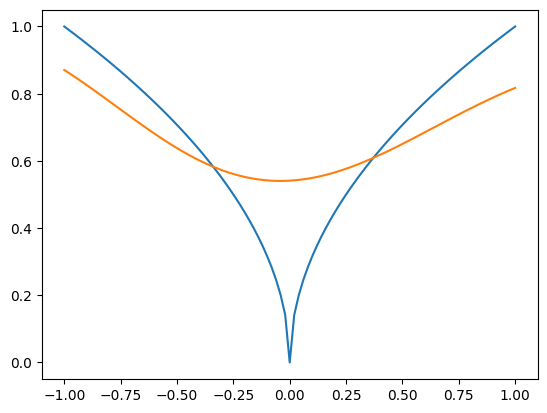

In [6]:
y_pred = vmap(model)(x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y_pred)